In [1]:
import torch
import torch_geometric.transforms as T
import torch.nn.functional as F
from torch_geometric.datasets import Planetoid
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import math
from utils import *

In [2]:
dataset = 'Cora'
path = "./"
dataset = Planetoid(path, dataset, transform=T.NormalizeFeatures())
data = dataset[0]
print(data)
print(f"Number of labels: {dataset.num_classes}")
print(f"Node meta data matrix shape: {data.x.shape}")
print(f"Edge list shape: {data.edge_index.shape}")
print(f"Node label matrix shape: {data.y.shape}")
print(f"Average node degree: {data.edge_index.shape[1]/data.x.shape[0]}")
print(data.x.numpy().shape)


Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])
Number of labels: 7
Node feature matrix shape: torch.Size([2708, 1433])
Edge list shape: torch.Size([2, 10556])
Node label matrix shape: torch.Size([2708])
Average node degree: 3.8980797636632203
(2708, 1433)


In [3]:
pca = PCA(n_components=50) # Principal Component
pca_embeddings = pca.fit_transform(data.x.numpy())
print(pca_embeddings.shape)

tsne = TSNE(n_components=2, random_state=0, init='random', perplexity=30, learning_rate='auto')
tsne_embeddings = tsne.fit_transform(pca_embeddings)
print(tsne_embeddings.shape)
print('Cumulative variance explained by 50 principal components: {}'.format(np.sum(pca.explained_variance_ratio_)))
print(tsne_embeddings[0:5])


(2708, 50)
(2708, 2)
Cumulative variance explained by 50 principal components: 0.3551563620567322
[[ 41.926285   35.499863 ]
 [ 41.429794    1.662693 ]
 [ -1.2607335  34.897156 ]
 [-23.095577  -14.565812 ]
 [ 18.369957  -35.984524 ]]


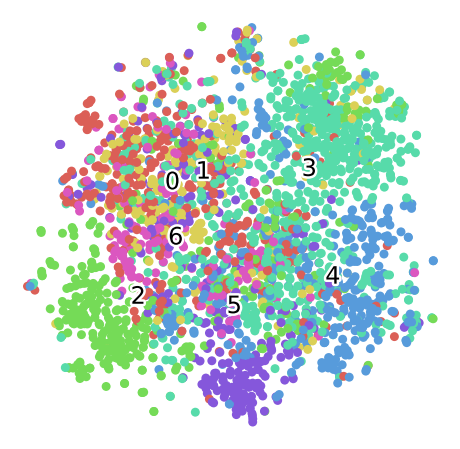

In [4]:
scatter_embeddings(tsne_embeddings, data.y.numpy(), word=False)

# Self-defined layer

In [5]:
lame = SuperLameGNN(dataset.num_features, 16, dataset.num_classes)
print(lame)
lame_acc = test(lame, data)
print(f'No training GCN test accuracy: {lame_acc*100:.2f}%\n')
lame_res = train(lame, data)

lame_acc = test(lame, data)
print(f'GCN test accuracy: {lame_acc*100:.2f}%\n')

SuperLameGNN(
  (gcn1): SuperLameGNNLayer(1433, 16)
  (gcn2): SuperLameGNNLayer(16, 7)
)
No training GCN test accuracy: 14.40%

Epoch   0 | Train Loss: 1.966 | Train Acc:  14.29% | Val Loss: 2.00 | Val Acc: 15.60%
Epoch  10 | Train Loss: 1.912 | Train Acc:  28.57% | Val Loss: 1.94 | Val Acc: 15.40%
Epoch  20 | Train Loss: 1.863 | Train Acc:  49.29% | Val Loss: 1.88 | Val Acc: 41.20%
Epoch  30 | Train Loss: 1.708 | Train Acc:  75.00% | Val Loss: 1.82 | Val Acc: 52.40%
Epoch  40 | Train Loss: 1.614 | Train Acc:  71.43% | Val Loss: 1.74 | Val Acc: 53.80%
Epoch  50 | Train Loss: 1.392 | Train Acc:  82.86% | Val Loss: 1.62 | Val Acc: 58.20%
Epoch  60 | Train Loss: 1.282 | Train Acc:  80.00% | Val Loss: 1.53 | Val Acc: 61.00%
Epoch  70 | Train Loss: 1.025 | Train Acc:  89.29% | Val Loss: 1.42 | Val Acc: 60.40%
Epoch  80 | Train Loss: 0.980 | Train Acc:  82.86% | Val Loss: 1.36 | Val Acc: 59.20%
Epoch  90 | Train Loss: 0.859 | Train Acc:  89.29% | Val Loss: 1.34 | Val Acc: 59.00%
Epoch 100 | 

# GCN

In [6]:
%%time

gcn = EvenLamerGCN(dataset.num_features, 16, dataset.num_classes)
print(gcn)
gcn_acc = test(gcn, data)
print(f'No training GCN test accuracy: {gcn_acc*100:.2f}%\n')
gcn_res = train(gcn, data)

gcn_acc = test(gcn, data)
print(f'GCN test accuracy: {gcn_acc*100:.2f}%\n')

EvenLamerGCN(
  (gcn1): GCNConv(1433, 16)
  (gcn2): GCNConv(16, 7)
)
No training GCN test accuracy: 10.80%

Epoch   0 | Train Loss: 1.945 | Train Acc:  15.00% | Val Loss: 1.95 | Val Acc: 8.60%
Epoch  10 | Train Loss: 1.842 | Train Acc:  72.86% | Val Loss: 1.90 | Val Acc: 45.20%
Epoch  20 | Train Loss: 1.689 | Train Acc:  79.29% | Val Loss: 1.82 | Val Acc: 47.00%
Epoch  30 | Train Loss: 1.482 | Train Acc:  85.00% | Val Loss: 1.73 | Val Acc: 51.80%
Epoch  40 | Train Loss: 1.314 | Train Acc:  87.86% | Val Loss: 1.63 | Val Acc: 52.80%
Epoch  50 | Train Loss: 1.073 | Train Acc:  88.57% | Val Loss: 1.50 | Val Acc: 59.00%
Epoch  60 | Train Loss: 0.896 | Train Acc:  91.43% | Val Loss: 1.37 | Val Acc: 65.00%
Epoch  70 | Train Loss: 0.811 | Train Acc:  92.86% | Val Loss: 1.30 | Val Acc: 66.60%
Epoch  80 | Train Loss: 0.696 | Train Acc:  92.86% | Val Loss: 1.20 | Val Acc: 68.80%
Epoch  90 | Train Loss: 0.618 | Train Acc:  95.00% | Val Loss: 1.14 | Val Acc: 70.40%
Epoch 100 | Train Loss: 0.554 | T

(2708, 2)
[[ 16.436398 -48.34078 ]
 [-28.672876 -44.09912 ]
 [-17.326591 -44.1685  ]
 [-44.51204   19.254171]
 [ 14.466301 -35.676975]]


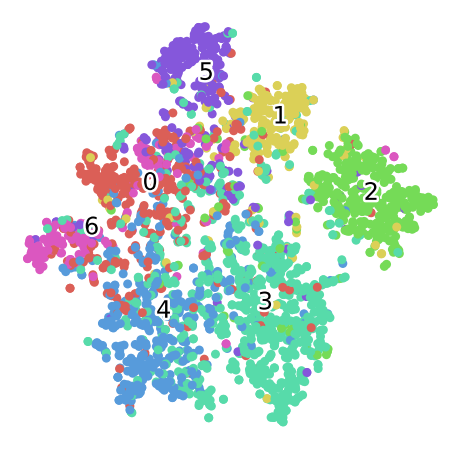

In [13]:
new_tsne = TSNE(n_components=2, random_state=42, init='random', perplexity=30, learning_rate='auto')
new_tsne_embeddings = new_tsne.fit_transform(gcn_res.detach().numpy())
print(new_tsne_embeddings.shape)
print(new_tsne_embeddings[0:5])
scatter_embeddings(new_tsne_embeddings, data.y.numpy(), word=False)

# GAT

In [8]:
gat = EvenLamerGAT(dataset.num_features, 16, dataset.num_classes)
print(gat)
gat_acc = test(gat, data)
print(f'No training GAT test accuracy: {gat_acc*100:.2f}%\n')
gat_res = train(gat, data)

gat_acc = test(gat, data)
print(f'GAT test accuracy: {gat_acc*100:.2f}%\n')

EvenLamerGAT(
  (gat1): GATv2Conv(1433, 16, heads=8)
  (gat2): GATv2Conv(128, 7, heads=1)
)
No training GAT test accuracy: 14.70%

Epoch   0 | Train Loss: 1.947 | Train Acc:  12.14% | Val Loss: 1.95 | Val Acc: 14.60%
Epoch  10 | Train Loss: 1.463 | Train Acc:  94.29% | Val Loss: 1.67 | Val Acc: 75.80%
Epoch  20 | Train Loss: 0.829 | Train Acc:  95.71% | Val Loss: 1.25 | Val Acc: 77.60%
Epoch  30 | Train Loss: 0.443 | Train Acc:  97.86% | Val Loss: 0.93 | Val Acc: 78.20%
Epoch  40 | Train Loss: 0.281 | Train Acc:  98.57% | Val Loss: 0.81 | Val Acc: 78.60%
Epoch  50 | Train Loss: 0.225 | Train Acc:  98.57% | Val Loss: 0.76 | Val Acc: 78.40%
Epoch  60 | Train Loss: 0.167 | Train Acc:  99.29% | Val Loss: 0.73 | Val Acc: 76.80%
Epoch  70 | Train Loss: 0.125 | Train Acc: 100.00% | Val Loss: 0.69 | Val Acc: 79.20%
Epoch  80 | Train Loss: 0.121 | Train Acc: 100.00% | Val Loss: 0.71 | Val Acc: 78.40%
Epoch  90 | Train Loss: 0.110 | Train Acc: 100.00% | Val Loss: 0.71 | Val Acc: 77.60%
Epoch 100

# GraphSAGE

In [9]:
sage = EvenLamerSAGE(dataset.num_features, 16, dataset.num_classes)
print(sage)
sage_acc = test(sage, data)
print(f'No training SAGE test accuracy: {sage_acc*100:.2f}%\n')
sage_res = train(sage, data)

sage_acc = test(sage, data)
print(f'SAGE test accuracy: {sage_acc*100:.2f}%\n')

EvenLamerSAGE(
  (gcn1): SAGEConv(1433, 16)
  (gcn2): SAGEConv(16, 7)
)
No training SAGE test accuracy: 12.80%

Epoch   0 | Train Loss: 1.954 | Train Acc:  12.14% | Val Loss: 1.94 | Val Acc: 15.20%
Epoch  10 | Train Loss: 1.751 | Train Acc:  66.43% | Val Loss: 1.87 | Val Acc: 37.20%
Epoch  20 | Train Loss: 1.410 | Train Acc:  82.86% | Val Loss: 1.71 | Val Acc: 47.20%
Epoch  30 | Train Loss: 1.017 | Train Acc:  91.43% | Val Loss: 1.50 | Val Acc: 53.40%
Epoch  40 | Train Loss: 0.671 | Train Acc:  93.57% | Val Loss: 1.34 | Val Acc: 59.00%
Epoch  50 | Train Loss: 0.454 | Train Acc:  96.43% | Val Loss: 1.22 | Val Acc: 59.60%
Epoch  60 | Train Loss: 0.316 | Train Acc:  99.29% | Val Loss: 1.13 | Val Acc: 61.20%
Epoch  70 | Train Loss: 0.282 | Train Acc:  98.57% | Val Loss: 1.06 | Val Acc: 65.60%
Epoch  80 | Train Loss: 0.240 | Train Acc:  98.57% | Val Loss: 1.02 | Val Acc: 68.20%
Epoch  90 | Train Loss: 0.232 | Train Acc: 100.00% | Val Loss: 0.98 | Val Acc: 69.80%
Epoch 100 | Train Loss: 0.19

# Other stuffs

In [10]:



class BruhLameGCNLayer(MessagePassing):
    def __init__(self, in_features, out_features, dropout):
        super(LameGCNLayer, self).__init__()
        self.in_features = in_features
        self.out_features = out_features
        self.dropout = dropout
        self.weight = torch.nn.Parameter(torch.Tensor(in_features, out_features))
        self.bias = torch.nn.Parameter(torch.Tensor(out_features))
        self.reset_parameters()

    def reset_parameters(self):
        torch.nn.init.kaiming_uniform_(self.weight, a=math.sqrt(5))
        torch.nn.init.constant_(self.bias, 0)

    def forward(self, x, edge_index):
        # X has shape [N, in_features)
        # edge_index has shape [2, E]





        """support = torch.mm(x, self.weight)
        output = torch.spmm(adj, support)
        output = output + self.bias
        output = F.relu(output)
        output = F.dropout(output, self.dropout, training=self.training)
        return output"""


In [11]:
# define GCN model
class LameGCNModel(torch.nn.Module):
    def __init__(self, in_features, out_features, num_layers, dropout):
        super(LameGCNModel, self).__init__()
        self.num_layers = num_layers
        self.layers = torch.nn.ModuleList()
        #self.layers.append(LameGCNLayer(in_features, out_features, dropout))
        for i in range(num_layers):
            self.layers.append(LameGCNLayer(out_features, out_features, dropout))

    def forward(self, x, adj):
        for i in range(self.num_layers):
            x = self.layers[i](x, adj)
        return x